# Classification Models

Classification Model termasuk jenis Supervised Machine Learning. Bedanya dengan Regression model ada di jenis target - untuk continuous kita gunakan Regression Model, dan untuk discrete (kategorikal) kita gunakan Classification.

- Logistic Regression
- K-NN (K - Nearest Neighbor)

Yang akan dibahas:
1. konsep algoritma machine learning logistic regression/ knn
2. implementasi algoritma ke contoh data
3. cara evaluasi kualitas model tipe Classification

Kita juga tetap menerapkan teknik yang sudah kita pelajari sebelumnya:
- encoding. Mengubah tipe data kategorikal menjadi numerik.
- train test split, memisahkan data menjadi dua set. train set. test set.
- memisahkan kolom kolom yang digunakan sebagai fitur, dan kolom yang digunakan sebagai target

Selain itu, untuk model tipe KNN, ada teknik yang namanya "elbow method" untuk mencari k value terbaik


## Logistic Regression

mirip dengan teknik Linear dan Polynomial regression yang sudah kita pelajari sebelumnya. Hanya, kita menggunakan formula *sigmoid* kali ini, dan bentuk garis yang dibuat formula ini seperti S.

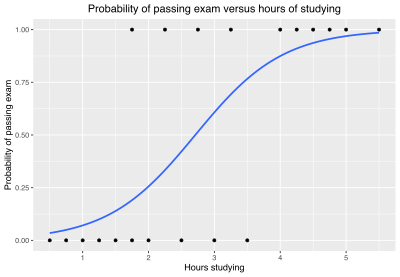

semakin dekat ke nilai 1, kita anggap dia semakin besar kemungkinannya masuk kategori 1. Di contoh diatas, semakin besar kemungkinan lulus.

semakin dekat ke nilai 0, kita anggap dia semakin besar kemunkinannya masuk kategori 0. Di contoh diatas, semakin besar kemungkinan tidak lulus.

kita biasanya memberikan threshold (pembatas) nilai, di 0.5, kalau nilai yang didapat diatas 0.5 prediksinya masuk kategori 1. kalau tidak, prediksinya masuk kategori 0.

## Implementasi Logistic Regression
contoh: kita gunakan heart dataset https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/heart.csv untuk membuat model Machine Learning tipe Classification dengan algoritma Logistic Regression untuk memprediksi apakah seseorang memiliki penyakit jantung atau tidak.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.datasets import load_digits

In [3]:
df_heart = pd.read_csv("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/heart.csv")
display(df_heart.info())
df_heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df_heart['target'].unique()

array([0, 1])

- age (umur)
- sex (gender, 1 = Pria, 0 = Wanita)
- exercise induced angina (merasakan sakit dada saat olahraga? 1 = ya, 0 = tidak)
- target (0 = sehat; 1 = sakit jantung)

In [5]:
# skip data cleaning
# remove missing valuse
# find and remove invalid values
# encoding convert non-numeric to numeric data

In [7]:
# split features dan target

X = df_heart[['age', 'sex', 'exang']] # selalu 2 dimensi
y = df_heart['target'] # selalu 1 dimensi

X.head()

,age,sex,exang
0,52,1,0
1,53,1,1
2,70,1,1
3,61,1,0
4,62,0,0


In [9]:
# split train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(768, 3)
(257, 3)
(768,)
(257,)


In [10]:
# membuat model Logistic Regression

model_heart_LR = LogisticRegression()
model_heart_LR.fit(X_train, y_train)

LogisticRegression()

In [14]:
# evaluasi model

# buat hasil prediksi dari data test
y_pred = model_heart_LR.predict(X_test)

# bandingkan dengan data asli test menggunakan
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 84,  39],
       [ 24, 110]])

dari data test kita yang aslinya target ada di value 0 (sakit)
- 84 di prediksi dengan benar
- 39 di prediksi sebagai value 1

dari data test kita yang aslinya target ada di value 1 (sehat)
- 24 di prediksi sebagai value 0
- 110 di prediksi dengan benar

kita bisa melihat, dari confusion matrix, total data test yang di prediksi dengan benar, dan dengan salah. kalau salah, dia di prediksi sebagai kategori yang mana.

di contoh diatas, ada 84 + 110 prediksi yang benar. ada 39 + 24 prediksi yang salah.

Selain dengan confusion matrix yang secara literal memberitahu kita jumlah prediksi yang benar/salah. kalau salah di prediksi sebagai apa... ada satu lagi teknik evaluasi model Classification. Dengan angka angka.

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       123
           1       0.74      0.82      0.78       134

    accuracy                           0.75       257
   macro avg       0.76      0.75      0.75       257
weighted avg       0.76      0.75      0.75       257



menghitung jumlah prediksi benar dan salah
- precision
- recall
- f1-score
- accuracy

jumlah data
- support

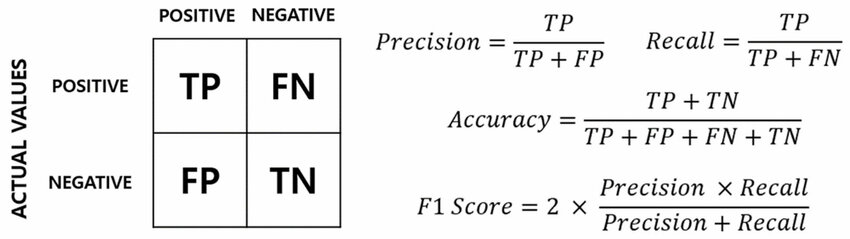

- accuracy: jumlah prediksi benar / jumlah data

untuk melihat akurasi per kategori, kita gunakan precision, recall, dan F1 score
- precision: true positive (kategori 0 beneran di prediksi kategori 0) / total dari true positive dan false positive (kategori bukan 0 tapi di prediksi sebagai 0)

precision menjelaskan seberapa besar kemunkinan hasil prediksi sebagai kategori ini, benaran kategori ini. dari semua hasil prediksi kategori ini, berapa banyak yang benar.

- recall: true positive / total true_positive dan false_negative (harusnya kategori 0 tapi di prediksi bukan 0)

recall menjelaskan dari keseluruhan data yang harusnya di kategori tertentu, berapa persen yang berhasil di prediksi sebagai kategori tersebut oleh model ini.

- f1 score: agregat rata-rata antara precision dan recall

## K-Nearest Neighbor

K-Nearest Neighbor atau KNN adalah algoritma Classification yang memiliki approach berbeda.

K-Nearest Neighbor membuat data baru yang mau di prediksi sebagai kategori apa, mengikuti kategori tetangga terdekatya. jumlah tetangga yang digunakan tergantung pilihan kita, mau 1,2,3,...

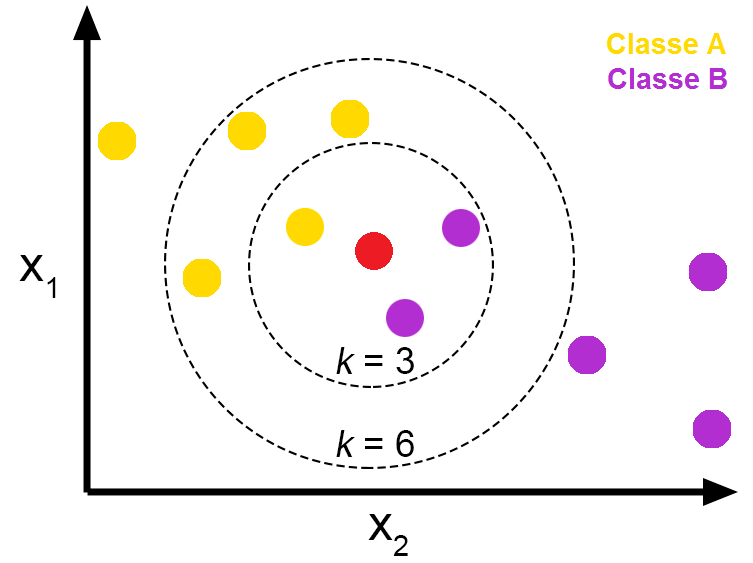

di gambar diatas, data yang mau kita prediksi masuk kategori A atau B berwarna merah.
- kalau kita memilih k=3, tiga tetangga terdekat kita, adalah kategori a, b, b, jadi data ini akan di prediksi sebagai b.
- kalau kita memilih k=6, enam tetangga terdekat kita, adalah kategori a,a,a,a dan b,b. Jadi data ini akan di prediksi sebagai a.

In [19]:
# dengan data df_heart yang sama, kita bisa buat model KNN

model_heart_knn = KNeighborsClassifier()
model_heart_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# evaluasi model
# hasil prediksi data test menggunakan model knn
y_pred = model_heart_knn.predict(X_test)

# confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 95,  28],
       [ 25, 109]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.80      0.81      0.80       134

    accuracy                           0.79       257
   macro avg       0.79      0.79      0.79       257
weighted avg       0.79      0.79      0.79       257



bandingkan hasil classification report model KNN kita dengan model Logistic Regression.

```
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       123
           1       0.74      0.82      0.78       134

    accuracy                           0.75       257
   macro avg       0.76      0.75      0.75       257
weighted avg       0.76      0.75      0.75       257
```

perhatikan kalau untuk kategori 0, precision menjadi sedikit lebih tinggi. recall jauh lebih tinggi. f1-score naik. akurasi juga naik.

hanya saja untuk kategori 1, precision naik, recall menurun sedikit, f1 score naik sedikit.

sepertinya model tipe KNN lebih baik untuk tujuan prediksi apakah seseorang sakit jantung/ tidak dari umur, sex, dan rasa sakit saat olahraga. tapi kalau recall dari kategori 1 -- untuk memprediksi yang sakit sebagai sakit sebanyak mungkin -- adalah sangat penting, mungkin kita tetap mau gunakan model Logistic Regression.

## Parameter sebuah Model
sebenarnya setiap jenis algoritma Machine Learning berbeda, memiliki parameter berbeda yang bisa kita ubah.

Ini masuk ke step tuning. tujuannya untuk meningkatkan akurasi model. kita ubah ubah detail algoritma Machine Learning yang kita gunakan.

Contohnya, model KNN kita bisa kita pilih mau gunakan berapa neighbor.

In [22]:
# buat ulang omdel dengan jumlah neighbor yang berbeda
# kalau n_neighbors tidak diisi, default nya 5
print("Model KNN dengan k=8")
model_heart_knn = KNeighborsClassifier(n_neighbors = 8)
model_heart_knn.fit(X_train, y_train)

# evaluasi model
# hasil prediksi data test menggunakan model knn
y_pred = model_heart_knn.predict(X_test)

# confusion matrix
display(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model KNN dengan k=8


array([[102,  21],
       [ 33, 101]])

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       123
           1       0.83      0.75      0.79       134

    accuracy                           0.79       257
   macro avg       0.79      0.79      0.79       257
weighted avg       0.79      0.79      0.79       257



Parameter sebuah model Machine Learning di sklearn bisa kita "tweak" tuning, ubah2, untuk mendapat hasil model yang berbeda.

Kalian boleh explore lebih lanjut parameter2 berbedanya (optional).

Umumnya untuk Logistic Regression, kita mau ubah jenis solver, dan jenis regularization C nya. Umumnya untuk KNN, kita mau ubah jumlah n_neighbors yang digunakan.

Terakhir, sebelum kita coba lagi membuat dua model Logistic Regression dan KNN dengan data berbeda, kita akan bahas teknik "elbow method" untuk mencari jumlah k terbaik.

### Elbow Method*
untuk mencari jumlah k terbaik, kita akan test satu per satu model dengan k berbeda. urut dari jumlah k kecil hingga jumlah k besar. min k=1, max k = jumlah data - 1. kita bisa plot accuracy model dari jumlah k sedikit hingga banyak, dan mencari jumlah k yang value accuracy terbaik.

kita akan plot jumlah k (x-axis) dan accuracy/ error rate (y-axis) dan memilih k dari yang error paling kecil/ accuracy paling tinggi

In [23]:
X_train.shape

(768, 3)

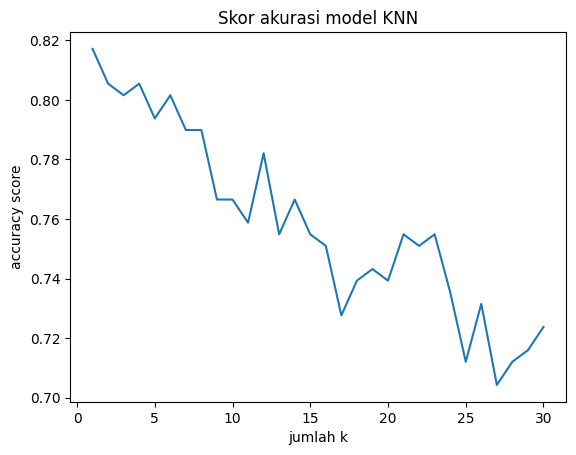

In [27]:
list_k = range(1, 31)
list_skor = []

for k in list_k:
  # kalau n_neighbors tidak diisi, default nya 5
  model_heart_knn = KNeighborsClassifier(n_neighbors = k)
  model_heart_knn.fit(X_train, y_train)

  # evaluasi model
  # hasil prediksi data test menggunakan model knn
  y_pred = model_heart_knn.predict(X_test)

  # accuracy score
  skor = accuracy_score(y_test, y_pred)
  list_skor.append(skor)

plt.plot(list_k, list_skor)
plt.title("Skor akurasi model KNN")
plt.xlabel("jumlah k")
plt.ylabel("accuracy score")
plt.show()

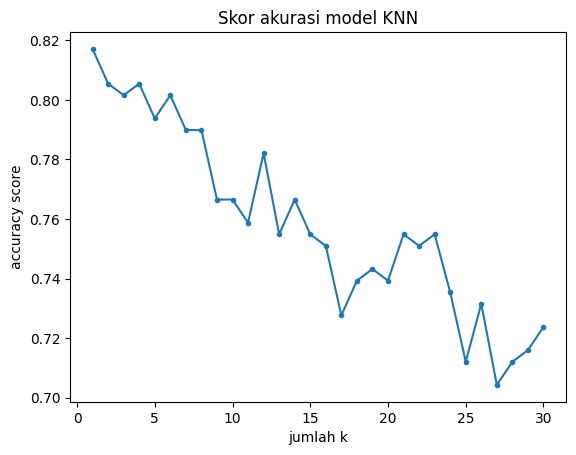

In [28]:
plt.plot(list_k, list_skor, marker=".")
plt.title("Skor akurasi model KNN")
plt.xlabel("jumlah k")
plt.ylabel("accuracy score")
plt.show()

sepertinya untuk model knn, data df_heart kita ini, akurasi terbaik didapat saat jumlah k=1.

## Encoding
Kita coba dengan data yang ada non-numerik data. Kita perlu ubah data non-numerik jadi numerik dulu, baru bisa kita gunakan untuk latih model Machine Learning.

contoh data yang kita gunakan kali ini tentang mobil https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/CarPrice_Assignment.csv dan kita akan ubah beberapa kolom data non-numerik jadi numerik.

In [29]:
df_car = pd.read_csv("https://github.com/stefkwan-h8/dataset/raw/refs/heads/main/CarPrice_Assignment.csv")
display(df_car.info())
df_car.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


misalnya kita mau prediksi **fueltype** yang punya dua kategori
- gas, atau
- diesel

kita mau menggunakan fitur mobil dari
- price,
- wheelbase,
- enginesize, dan
- carbody

In [30]:
df_car['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [31]:
df_car[['price', 'wheelbase','enginesize']].describe()

,price,wheelbase,enginesize
count,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,126.907317
std,7988.852332,6.021776,41.642693
min,5118.000000,86.600000,61.000000
25%,7788.000000,94.500000,97.000000
50%,10295.000000,97.000000,120.000000
75%,16503.000000,102.400000,141.000000
max,45400.000000,120.900000,326.000000


In [32]:
df_car['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [33]:
df_car['carbody'].nunique()

5

In [34]:
# kita gunakan LabelEncoder

le = LabelEncoder()
le.fit(df_car['fueltype'])

print('fueltype', le.classes_)

df_car['fueltype_en'] = le.transform(df_car['fueltype'])

df_car['fueltype_en']

fueltype ['diesel' 'gas']


,fueltype_en
0,1
1,1
2,1
3,1
4,1
...,...
200,1
201,1
202,1
203,0


yang tadinya diesel 'berubah' jadi 0

yang tadinya gas 'berubah' jadi 1

In [35]:
# untuk kolom carbody juga
le = LabelEncoder()
le.fit(df_car['carbody'])
print('carbody', le.classes_)

df_car['carbody_en'] = le.transform(df_car['carbody'])
df_car['carbody_en']

carbody ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']


,carbody_en
0,0
1,0
2,2
3,3
4,3
...,...
200,3
201,3
202,3
203,3


tadinya text ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']

menjadi 0, 1, 2, 3, 4

In [36]:
# fitur

X = df_car[['price', 'wheelbase','enginesize', 'carbody_en']]
X.head()

,price,wheelbase,enginesize,carbody_en
0,13495.0,88.6,130,0
1,16500.0,88.6,130,0
2,16500.0,94.5,152,2
3,13950.0,99.8,109,3
4,17450.0,99.4,136,3


In [37]:
# target

y = df_car['fueltype_en']
y[:5]

,fueltype_en
0,1
1,1
2,1
3,1
4,1


setelah data kita encoding, dan data numerik semua, kita bisa lanjut ke pembuatan model Machine Learning

In [38]:
# split train dan test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153, 4)
(52, 4)
(153,)
(52,)


In [41]:
# latih model

# Logistic Regression
model_car_LR = LogisticRegression(solver='lbfgs', max_iter=300)
model_car_LR.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [42]:
# KNN
model_car_KNN = KNeighborsClassifier()
model_car_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# evaluasi model

y_pred_LR = model_car_LR.predict(X_test)

y_pred_KNN = model_car_KNN.predict(X_test)

In [44]:
confusion_matrix(y_test, y_pred_LR)

array([[ 0,  2],
       [ 1, 49]])

In [45]:
confusion_matrix(y_test, y_pred_KNN)

array([[ 0,  2],
       [ 0, 50]])

In [46]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.96      0.98      0.97        50

    accuracy                           0.94        52
   macro avg       0.48      0.49      0.49        52
weighted avg       0.92      0.94      0.93        52



In [47]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.96      1.00      0.98        50

    accuracy                           0.96        52
   macro avg       0.48      0.50      0.49        52
weighted avg       0.92      0.96      0.94        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


target 0 = diesel. target 1 = gas.

dari kedua model yang kita buat, tidak ada yang bisa prediksi mobil tipe diesel.

In [48]:
y_test.value_counts()

,count
fueltype_en,
1,50
0,2


tapi kalau kita lihat dari dataset test kita, 50 adalah tipe mobil gas. 2 tipe mobil diesel.

kita bisa cek data training kita.

In [49]:
y_train.value_counts()

,count
fueltype_en,
1,135
0,18


hampir sama, data mobil gas ada 135. data mobil diesel ada 18.

data yang jomplang jumlahnya seperti ini, memang sulit untuk dijadikan model machine learning yang baik.

karena itu modelnya tidak bisa akurat.

## Case Study: Digits Image Recognition

Kita akan gunakan dataset gambar bitmap ukuran 8x8 pixel dimana setiap pixel berisi nilai antara 0... 16 dan merupakan gambar tulisan tangan angka.

Antara angka 0... 9.

Kita akan buat model Machine Learning untuk memprediksi sebuah gambar itu angka berapa.

dataset bisa diambil dari sklearn.datasets.load_digits yang aslinya adalah dataset milik https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits

In [51]:
from sklearn.datasets import load_digits

In [60]:
df_data = pd.DataFrame(load_digits().data, columns = load_digits().feature_names)

df_data.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [61]:
df_data.shape

(1797, 64)

In [62]:
target = load_digits().target

target

array([0, 1, 2, ..., 8, 9, 8])

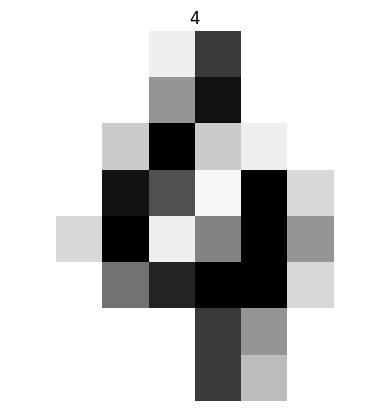

In [72]:
# kita ambil satu gambar
n = 100
gambar = np.array(df_data.loc[n]).reshape(8,8)

plt.imshow(gambar, cmap='Greys')
plt.title(target[n])
plt.axis("off")
plt.show()

In [74]:
# fitur dan target

X = df_data
y = target


# split train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# latih model

model_LR = LogisticRegression(max_iter=300)
model_LR.fit(X_train, y_train)

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

# evaluasi model

y_pred_LR = model_LR.predict(X_test)
y_pred_KNN = model_KNN.predict(X_test)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [75]:
print("model Logistic Regression")

display(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

model Logistic Regression


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [76]:
print("model KNN")

display(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

model KNN


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 43,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  1, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 46]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        43
           2       1.00      0.98      0.99        44
           3       0.94      1.00      0.97        45
           4       1.00      0.97      0.99        38
           5       0.96      0.98      0.97        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       1.00      0.92      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## Extra: membuat visual Confusion Matrix

In [81]:
def visualCM(cm, jumlah_target, label_target=range(10), graph_title=""):
  fig, ax = plt.subplots(figsize=(jumlah_target/2, jumlah_target/2))
  ax.imshow(cm)
  ax.grid(False)
  ax.set_xlabel('Predicted outputs', color='black')
  ax.set_ylabel('Actual outputs', color='black')
  ax.xaxis.set(ticks=label_target)
  ax.yaxis.set(ticks=label_target)
  ax.set_ylim(jumlah_target-0.5, -0.5)
  ax.set_title(graph_title)
  for i in range(jumlah_target):
    for j in range(jumlah_target):
      ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.show()

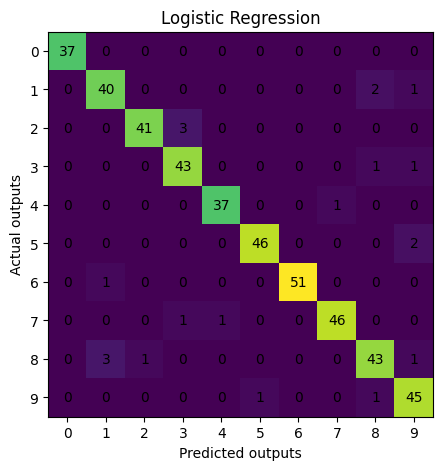

In [82]:
cm = confusion_matrix(y_test, y_pred_LR)

visualCM(cm, 10, graph_title="Logistic Regression")

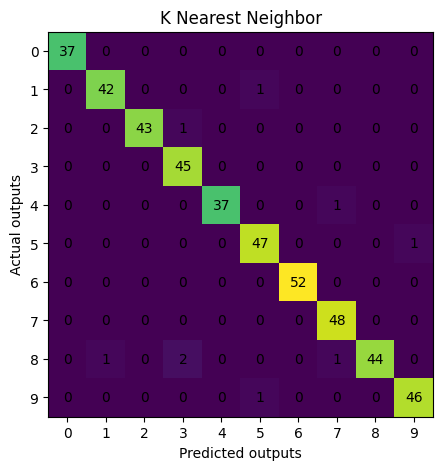

In [83]:
cm = confusion_matrix(y_test, y_pred_KNN)

visualCM(cm, 10, graph_title="K Nearest Neighbor")